In [1]:
%load_ext autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ESN.ESN import DHESN, EESN_ENCODED, ESN
from Helper.utils import nrmse
from MackeyGlass.MackeyGlassGenerator import run
from MackeyGlass.HenonGenerator import runHenon
import time

hello


In [2]:
data_vae = pd.read_csv("DHESN_RESULTS/DHESN_data_VARIOUS_DHESN_WITH_VAE_GRID_SEARCH_3__2018-03-20.csv", delimiter=',')
data_vae_no_zeros = data_vae.drop(data_vae[data_vae[data_vae.columns[0]] == 0].index)
len(data_vae_no_zeros)

740

In [3]:
data_vae_no_zeros.sort_values(by=[data_vae_no_zeros.columns[-2]])

,# No. res,res sizes (min),(max),echo values (min),(max).1,spectral values (min),(max).2,weightin (min),(max).3,dimsrec (min),(max).4,epochs,reg.,NRMSE (mean),(std)
283,8,100,500,0.50,0.1,0.9,0.3,0.5,1.0,100.0,10.0,4,0.000001,0.3376,0.124019
52,8,100,500,0.50,0.1,0.4,1.2,1.0,0.5,100.0,10.0,2,0.010000,0.3614,0.145792
262,8,100,500,0.50,0.1,1.2,0.4,0.5,1.0,10.0,100.0,2,0.000001,0.3694,0.191668
269,8,100,500,0.50,0.1,0.3,0.9,0.5,1.0,100.0,10.0,4,0.010000,0.3751,0.073126
48,8,100,500,0.50,0.1,0.4,1.2,1.0,0.5,60.0,60.0,2,0.010000,0.3859,0.095853
190,8,100,500,0.40,0.4,0.9,0.3,1.0,0.5,10.0,100.0,2,0.000001,0.3954,0.270699
545,8,100,500,0.40,0.4,1.2,0.4,0.5,0.5,100.0,10.0,4,0.010000,0.3968,0.231874
276,8,100,500,0.50,0.1,0.9,0.3,0.5,1.0,60.0,60.0,2,0.010000,0.4024,0.167912
669,8,500,100,0.50,0.1,0.9,0.3,1.0,0.5,10.0,100.0,4,0.010000,0.4074,0.130122
62,8,100,500,0.50,0.1,1.2,0.4,1.0,0.5,60.0,60.0,2,0.000001,0.4131,0.101720


In [4]:
data_run = run(15100)
# print(data_run)
data = np.array([data_run]).reshape(-1, 1)
# print(data)
MEAN_OF_DATA = np.mean(data)
STD_OF_DATA = np.std(data)
split = 14100
# split = 2100
X_train = np.array(data[:split-1])
# X_train -= MEAN_OF_DATA
# X_train /= STD_OF_DATA
y_train = np.array(data[1:split])
# y_train -= MEAN_OF_DATA
# y_train /= STD_OF_DATA
X_valid = np.array(data[split-1:-1])
# X_valid -= MEAN_OF_DATA
# X_valid /= STD_OF_DATA
y_valid = np.array(data[split:])
# y_valid -= MEAN_OF_DATA
# y_valid /= STD_OF_DATA
print(data)

DONE
[[ 1.13015527]
 [ 1.13748125]
 [ 1.14744652]
 ..., 
 [ 0.50424967]
 [ 0.55082329]
 [ 0.61420139]]


In [10]:
runs = 1
_errs = []
_times = []
for _ in range(runs):
    n=2
    start_time = time.time()
#     dhesn = DHESN(1, 1, num_reservoirs = n, 
#                   reservoir_sizes=np.linspace(100, 500, n, endpoint=True).astype(int),
#                   echo_params=np.linspace(0.5, 0.1, n, endpoint=True),
#                   regulariser=1e-6,
#                   init_echo_timesteps=100,
#                   dims_reduce=np.linspace(100, 10, n-1, endpoint=True).astype(int).tolist(),
#                   encoder_type='VAE', train_epochs=4)
#     dhesn.initialize_input_weights(scales=np.linspace(0.5, 1.0, n, endpoint=True).tolist(), strategies='uniform')
#     dhesn.initialize_reservoir_weights(spectral_scales=np.linspace(0.9, 0.3, n, endpoint=True).tolist(), 
#                                        strategies=['uniform']*n,
#                                        sparsity=0.1)
    
    dhesn = EESN_ENCODED(1, 1, num_reservoirs = n, 
                  reservoir_sizes=np.linspace(50, 250, n, endpoint=True).astype(int),
                  echo_params=np.linspace(0.85, 0.5, n, endpoint=True),
                  regulariser=1e-2,
                  init_echo_timesteps=100,
                  dims_reduce=np.linspace(10, 100, n, endpoint=True).astype(int).tolist(),
                  train_epochs=10)
    dhesn.initialize_input_weights(scales=np.linspace(0.5, 0.5, n, endpoint=True).tolist(), strategies='uniform')
    dhesn.initialize_reservoir_weights(spectral_scales=np.linspace(0.9, 1.25, n, endpoint=True).tolist(), 
                                       strategies=['uniform']*n,
                                       sparsity=0.1)
#     start_time = time.time()
#     dhesn = ESN(1, 1, 
#                   reservoir_size=1000,
#                   echo_param=0.85,
#                   regulariser=1e-5,
#                   init_echo_timesteps=100
#                   )
#     dhesn.initialize_input_weights(scale=1.0, strategy='uniform', sparsity=1.0)
#     dhesn.initialize_reservoir_weights(spectral_scale=1.25, 
#                                        strategy='uniform',
#                                        sparsity=1.0)
#     dhesn.initialize_input_weights(scale=0.1, strategy='uniform', sparsity=0.1)
#     dhesn.initialize_reservoir_weights(spectral_scale=0., 
#                                        strategy='binary',
#                                        sparsity=0.2)

#     dhesn = DHESN(1, 1, num_reservoirs = n, 
#                   reservoir_sizes=np.linspace(500, 500, n, endpoint=True).astype(int),
#                   echo_params=np.linspace(0.5, 0.1, n, endpoint=True),
#                   regulariser=1e-2,
#                   init_echo_timesteps=100,
#                   dims_reduce=np.linspace(10, 100, n-1, endpoint=True).astype(int).tolist(),
#                   encoder_type='VAE', train_epochs=100, train_batches=128)
#     dhesn = DHESN(1, 1, num_reservoirs = n, 
#                   reservoir_sizes=np.linspace(500, 500, n, endpoint=True).astype(int),
#                   echo_params=np.linspace(0.5, 0.85, n, endpoint=True),
#                   regulariser=1e-5,
#                   init_echo_timesteps=100,
#                   dims_reduce=np.linspace(10, 100, n-1, endpoint=True).astype(int).tolist(),
#                   encoder_type='VAE', train_epochs=50, train_batches=32)
#     dhesn.initialize_input_weights(scales=np.linspace(0.5, 1.0, n, endpoint=True).tolist(), strategies='uniform',
#                                        sparsity=1.0)
#     dhesn.initialize_reservoir_weights(spectral_scales=np.linspace(0.9, 0.3, n, endpoint=True).tolist(), 
#                                        strategies=['uniform']*n,
#                                        sparsity=0.1)
#     dhesn.initialize_reservoir_weights(spectral_scales=np.linspace(0.9, 1.25, n, endpoint=True).tolist(), 
#                                        strategies=['uniform']*n,
#                                        sparsity=0.1)
    
#     start_time = time.time()
#     dhesn = DHESN(1, 1, num_reservoirs = n, 
#                   reservoir_sizes=np.linspace(200, 400, n, endpoint=True).astype(int),
#                   echo_params=np.linspace(0.5, 0.1, n, endpoint=True),
#                   regulariser=1e-6,
#                   init_echo_timesteps=100,
#                   dims_reduce=np.linspace(30, 80, n-1, endpoint=True).astype(int).tolist(),
#                   encoder_type='PCA')
#     dhesn.initialize_input_weights(scales=np.linspace(0.5, 0.5, n, endpoint=True).tolist(), strategies='uniform')
#     dhesn.initialize_reservoir_weights(spectral_scales=np.linspace(0.4, 1.2, n, endpoint=True).tolist(), 
#                                        strategies=['uniform']*n,
#                                        sparsity=0.1)


#     dhesn = DHESN(1, 1, num_reservoirs = n, 
#                   reservoir_sizes=np.linspace(300, 300, n, endpoint=True).astype(int),
#                   echo_params=np.linspace(0.5, 0.1, n, endpoint=True),
#                   regulariser=1e-6,
#                   init_echo_timesteps=100,
#                   dims_reduce=np.linspace(60, 60, n-1, endpoint=True).astype(int).tolist(),
#                   encoder_type='PCA')
#     dhesn.initialize_input_weights(scales=np.linspace(0.5, 0.5, n, endpoint=True).tolist(), strategies='uniform')
#     dhesn.initialize_reservoir_weights(spectral_scales=np.linspace(1.2, 0.4, n, endpoint=True).tolist(), 
#                                        strategies=['uniform']*n,
#                                        sparsity=0.1)
    dhesn.train(X_train, y_train)
    #     generate

    outs = []
    u_n = np.array(X_valid[0])
    print(u_n)
    for i in range(len(data[split:])):
#         if i % 2 == 0:
#             u_n = np.array(X_valid[i])
        u_n = np.array(dhesn.forward(u_n))
        outs.append(u_n)

    outs = np.array(outs).squeeze()
    y_vals = y_valid.squeeze()

    err = nrmse(y_vals, outs, MEAN_OF_DATA)
    _errs.append(err)
    print("NRMSE: {}".format(err))
    
    total_time = time.time() - start_time
    _times.append(total_time)
    print("TIME: {}".format(total_time))

====> 1 Test set loss: 9.1671
====> 2 Test set loss: 7.2392
====> 3 Test set loss: 6.3800
====> 4 Test set loss: 5.9106
====> 5 Test set loss: 5.5721
====> 6 Test set loss: 5.3315
====> 7 Test set loss: 5.2186
====> 8 Test set loss: 5.1550
====> 9 Test set loss: 5.1034
====> 10 Test set loss: 5.0774
====> 1 Test set loss: 28.3340
====> 2 Test set loss: 23.4999
====> 3 Test set loss: 20.0773
====> 4 Test set loss: 18.4658
====> 5 Test set loss: 16.0545
====> 6 Test set loss: 15.7015
====> 7 Test set loss: 14.4772
====> 8 Test set loss: 14.8329
====> 9 Test set loss: 13.5811
====> 10 Test set loss: 13.3721
[ 0.90105467]
NRMSE: 2.68473403085e+35
TIME: 27.1451702118


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.5058823529411764, 0.4470588235294118, 0.6980392156862745), (0.8, 0.7254901960784313, 0.4549019607843137), (0.39215686274509803, 0.7098039215686275, 0.803921568627451), (0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196)]


NameError: name 'dhesn2' is not defined

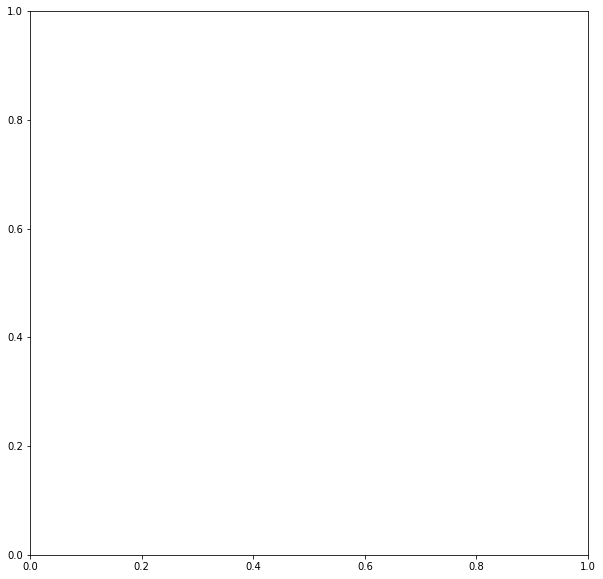

In [12]:
colors = sns.color_palette("deep", 8)
print(colors)
figV, axV = plt.subplots(figsize=(10, 10))
for i, e in enumerate(dhesn2.encoders):
    s = e.sample()
    print(np.shape(s))
    axV.plot(range(len(s)), s, color=colors[i], label='VAE {}'.format(6-i+1))


handles, labels = axV.get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
plt.legend(handle_list, label_list)


axV.set_ylabel("sampled unit Gaussian")
axV.set_xlabel("latent variables")
plt.show()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.5058823529411764, 0.4470588235294118, 0.6980392156862745), (0.8, 0.7254901960784313, 0.4549019607843137), (0.39215686274509803, 0.7098039215686275, 0.803921568627451), (0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196)]
(200, 500)


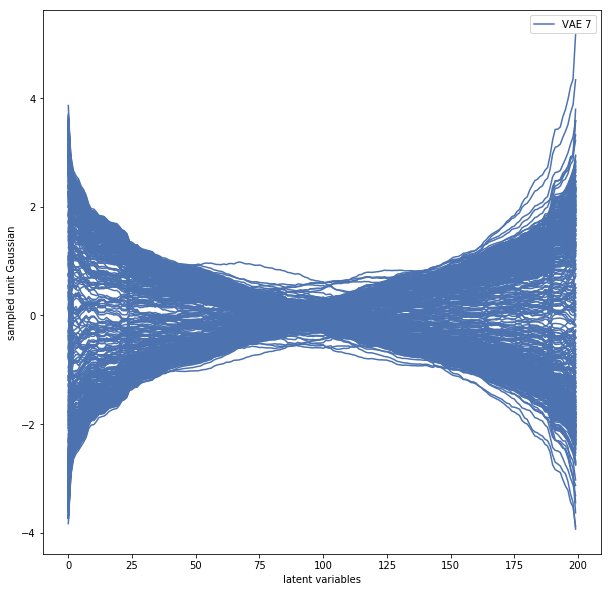

In [14]:
colors = sns.color_palette("deep", 8)
print(colors)
figV, axV = plt.subplots(figsize=(10, 10))
for i, e in enumerate(dhesn.encoders[::-1]):
    s = e.sample()
    print(np.shape(s))
    axV.plot(range(len(s)), s, color=colors[i], label='VAE {}'.format(6-i+1))


handles, labels = axV.get_legend_handles_labels()
handle_list, label_list = [], []
for handle, label in zip(handles, labels):
    if label not in label_list:
        handle_list.append(handle)
        label_list.append(label)
plt.legend(handle_list, label_list)


axV.set_ylabel("sampled unit Gaussian")
axV.set_xlabel("latent variables")
plt.show()

<IPython.core.display.Javascript object>


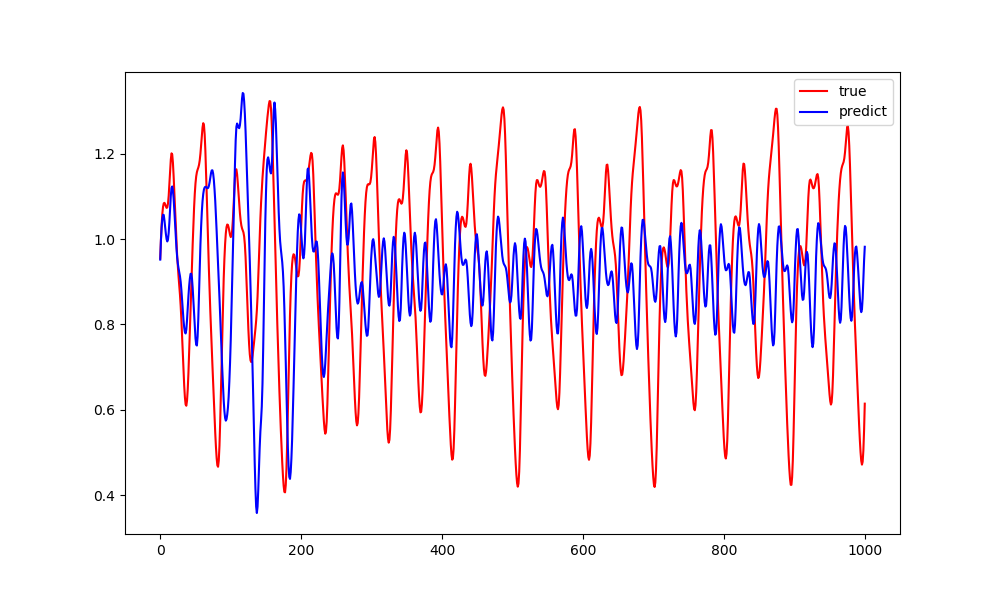

In [6]:
%matplotlib notebook

fg, ag = plt.subplots(figsize=(10, 6))
num = 1000
ag.plot(range(len(y_vals[:num])), y_vals[:num], label="true", color="red")
ag.plot(range(len(outs[:num])), outs[:num], label="predict", color="blue")
ag.legend()
plt.show()

<IPython.core.display.Javascript object>


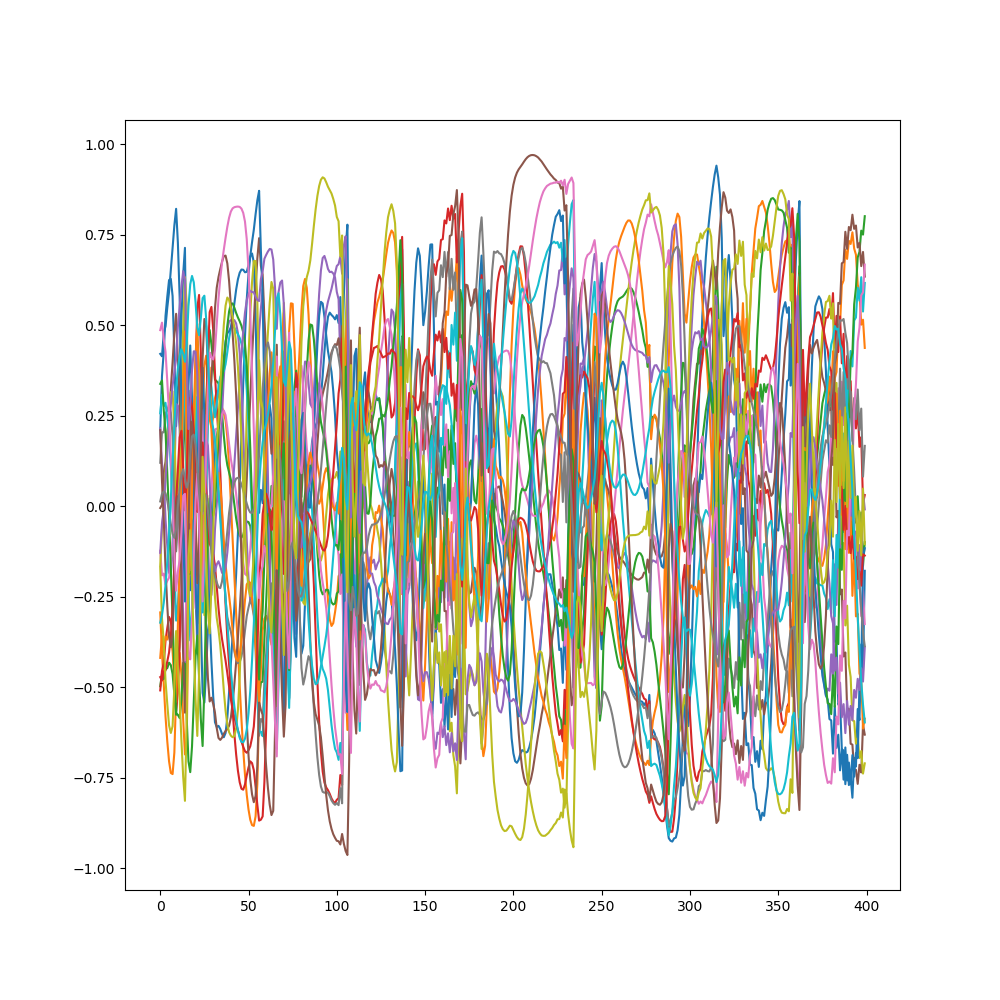

(1000, 500)


In [124]:
%matplotlib notebook

# plot the encoded data
fig, axs4 = plt.subplots(figsize=(10, 10), sharey=True)
e = np.array(dhesn.reservoir.signals[-1000:])[:, 0, :]
#     e = np.array([a[0] for a in r.signals[14100:]])
#     print(e.shape)
#     e = np.array(r.signals[:][0][:])
#     print(np.shape(e))
#     encoder_signal = np.array(dhesn.encoder_signals[0])
print(np.shape(e))
num = 400
num_signals = 20
axs4.plot(range(num), e[:num, :num_signals])
plt.show()

<IPython.core.display.Javascript object>


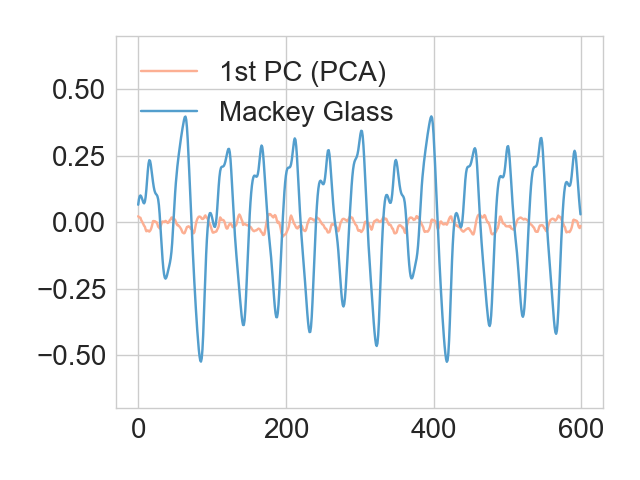

[]

In [62]:
f5, a5 = plt.subplots()

num=600
offset = 370
a5.plot(range(num), -np.array(dhesn.encoder_signals[0])[:num, 0]*0.6, color=sns.color_palette("Reds")[1], label="1st PC (PCA)")
a5.plot(range(num), X_train[offset:(offset+num)]-MEAN_OF_DATA, color=sns.color_palette("Blues")[3], label="Mackey Glass")
a5.set_ylim([-0.7, 0.7])
a5.legend()
f5.tight_layout()
plt.plot()
# f5.savefig("FIRST_PC_DHESN_PCA.pdf")

<IPython.core.display.Javascript object>


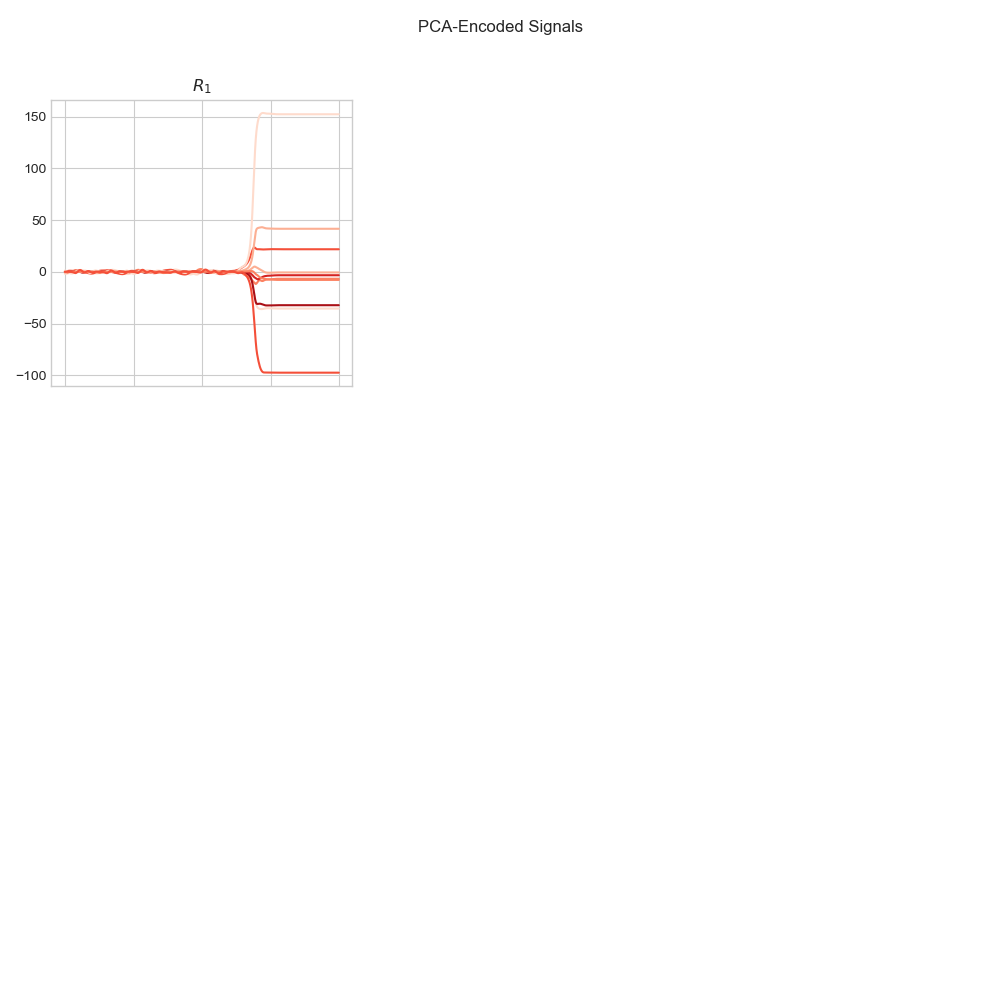

(1000, 10)
(1000, 10)


In [16]:
%matplotlib notebook

sns.set_style("whitegrid")
sns.set_palette("Reds")

# plot the encoded data
r=3
c=3

fig, axs = plt.subplots(r, c, figsize=(10, 10), sharey=True, sharex=True)
for idx, e in enumerate(dhesn.encoder_signals):
    e = np.array(e)
    print(np.shape(e))
    row = idx // c
    col = idx % c
#     encoder_signal = np.array(dhesn.encoder_signals[0])
    print(np.shape(e))
    num = 400
    axs[row, col].plot(range(num), e[:num, :])
    axs[row, col].set_title(r'$R_{}$'.format(idx+1))
       
for i in range(len(dhesn.encoder_signals), r*c):
    row = i // c
    col = i % c
    fig.delaxes(axs[row, col])
    
# a_.plot(range(num), np.array(dhesn.encoder_signals[0])[:num, :])
# a_.plot(range(num), X_train[:num]-MEAN_OF_DATA, color="Blue")
# a_.set_ylim([-1, 1])
    
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle("PCA-Encoded Signals")
# fig.savefig("DHESN_PCA_ENCODED_SIGNALS.pdf")
plt.show()

<IPython.core.display.Javascript object>


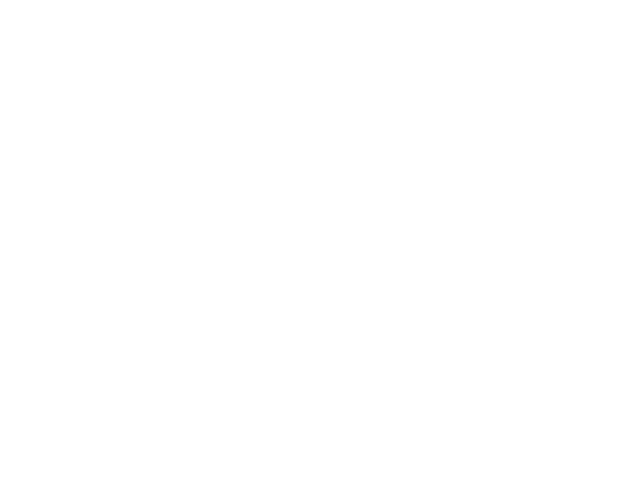

<IPython.core.display.Javascript object>


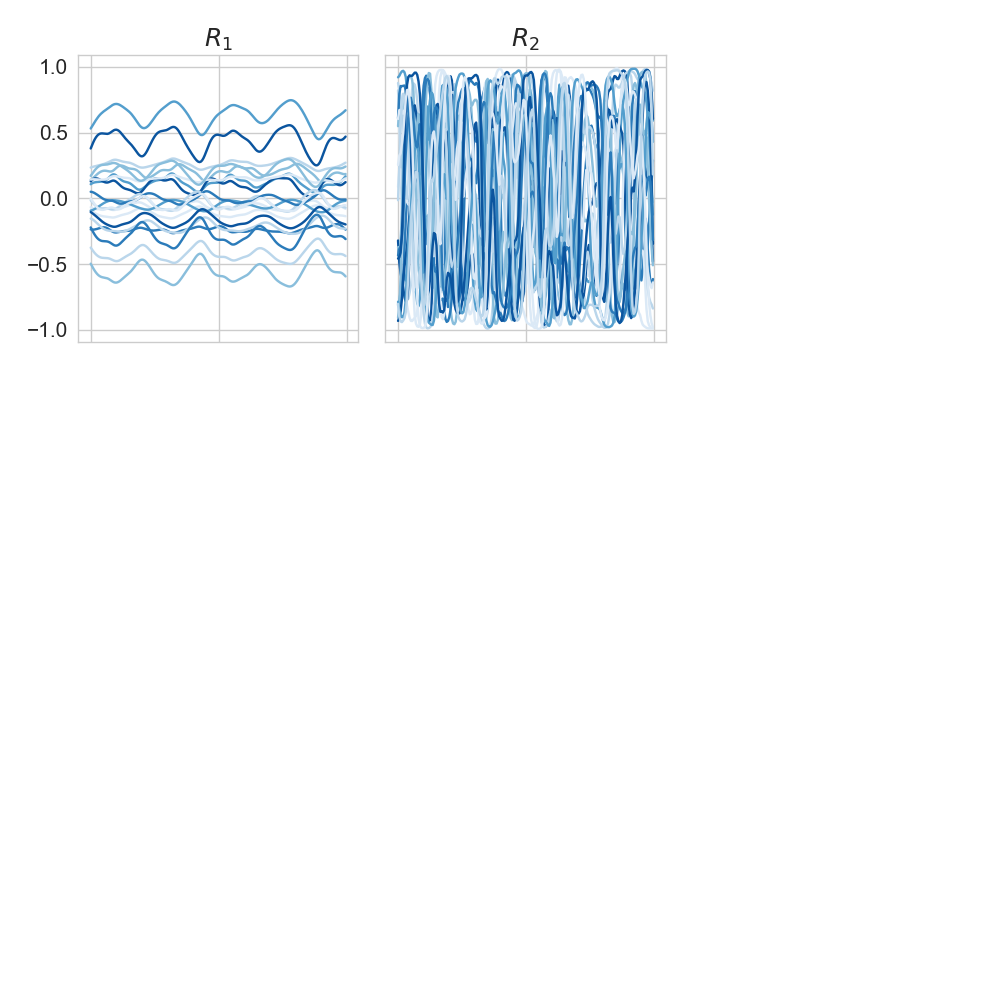

(1000, 500)
(1000, 500)


In [17]:
%matplotlib notebook

sns.set_style("whitegrid")
sns.despine()
sns.set_palette("Blues")
sns.set_context("notebook", font_scale=1.5)

# plot the encoded data
rows = 3
cols = 3
fig4, axs4 = plt.subplots(rows, cols, figsize=(10, 10), sharey=True, sharex=True)
for idx, r in enumerate(dhesn.reservoirs):
    e = np.array(r.signals[-1000:])[:, 0, :]
#     e = np.array([a[0] for a in r.signals[14100:]])
#     print(e.shape)
#     e = np.array(r.signals[:][0][:])
#     print(np.shape(e))
    row = idx // cols
    col = idx % cols
#     encoder_signal = np.array(dhesn.encoder_signals[0])
    print(np.shape(e))
    num = 200
    num_signals = 20
    axs4[row, col].plot(range(num), e[:num, :num_signals])
    axs4[row, col].set_title(r'$R_{}$'.format(idx+1))
    
    if row == 2 and col == 1:
        axs4[row, col].set_xlabel("time steps")
    
for i in range(len(dhesn.reservoirs), rows*cols):
    row = i // cols
    col = i % cols
    fig4.delaxes(axs4[row, col])
    
fig4.tight_layout()
# fig4.subplots_adjust(top=0.9)
fig4.show()
# fig4.suptitle("DHESN-PCA")
# fig4.savefig("DHESN_PCA_SIGNALS.pdf")

<IPython.core.display.Javascript object>


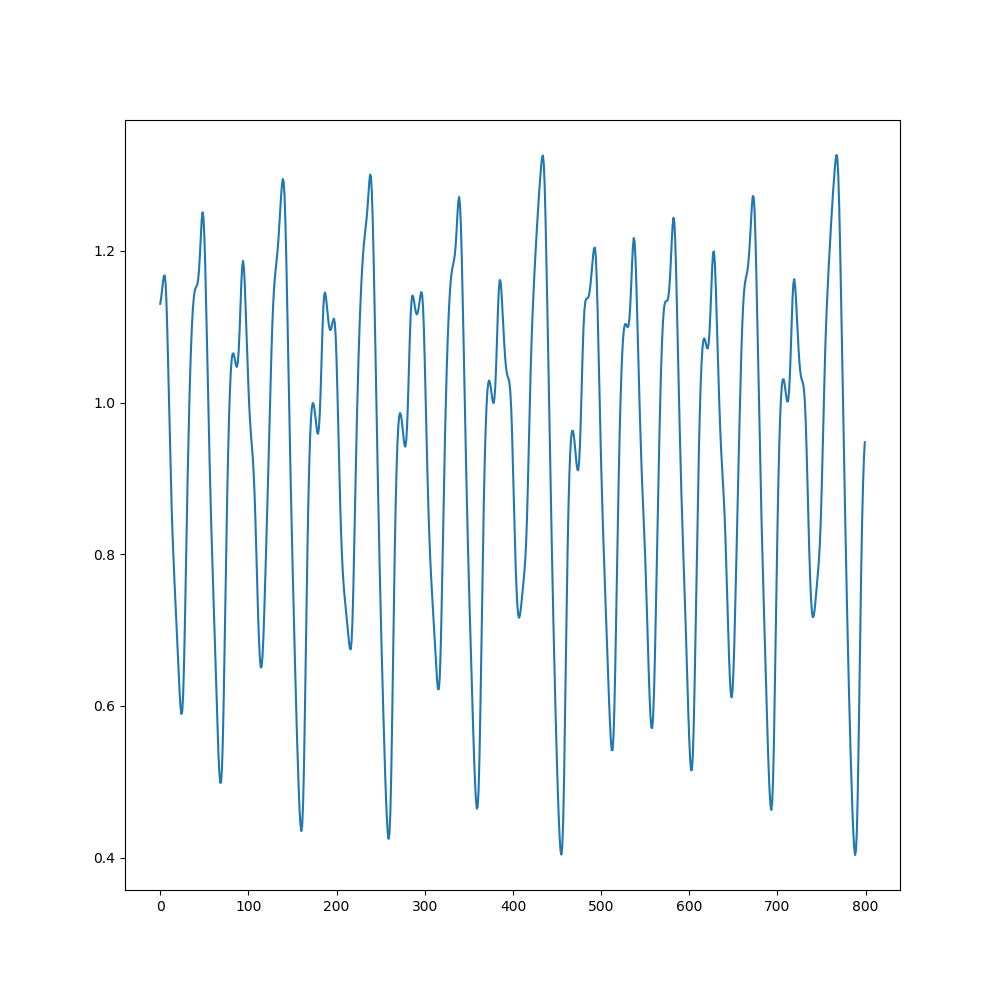

In [14]:
fig, ax3 = plt.subplots(figsize=(10, 10))
ax3.plot(range(800), data[:800])
plt.show()

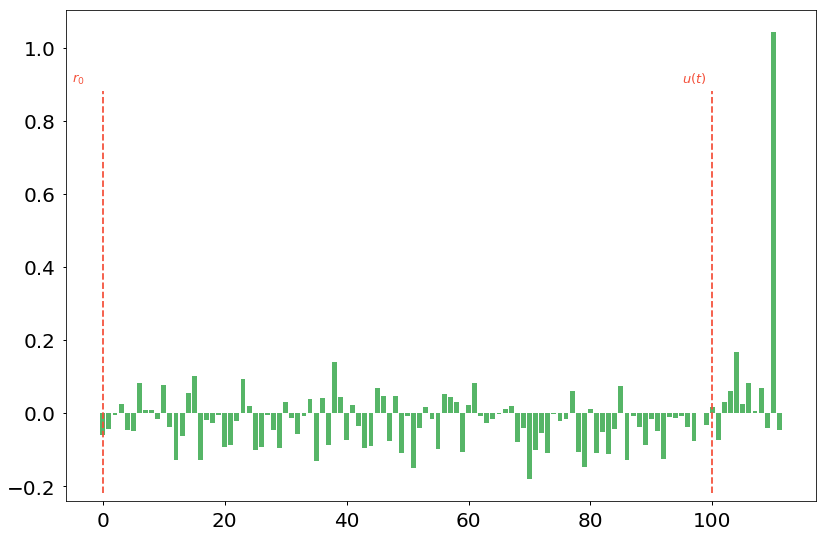

In [8]:
sns.set_context("notebook", font_scale=2.)

fig, ax2 = plt.subplots(figsize=(12, 8))
w = dhesn.W_out.flatten()
ax2.bar(range(len(w)), w, color=sns.color_palette("Greens")[3])
culm = 0
y_min, y_max = ax2.get_ylim()

for idx,b in enumerate(np.linspace(100, 100, n-1, endpoint=True).astype(int).tolist()):
    ax2.plot([culm]*2, [y_min*0.9, y_max*0.8], color=sns.color_palette("Reds")[3], linestyle="--")
    ax2.text(culm-5, y_max*0.82, r'$r_{}$'.format(idx), color=sns.color_palette("Reds")[3], fontsize=13.0)
    culm += b
    
ax2.plot([culm]*2, [y_min*0.9, y_max*0.8], color=sns.color_palette("Reds")[3], linestyle="--")
ax2.text(culm-5, y_max*0.82, r'$u(t)$', color=sns.color_palette("Reds")[3], fontsize=13.0)
    
ax2.set_ylim((y_min, y_max))
fig.tight_layout()
plt.show()
# fig.savefig("DHESN_PCA_weights.pdf")

<IPython.core.display.Javascript object>


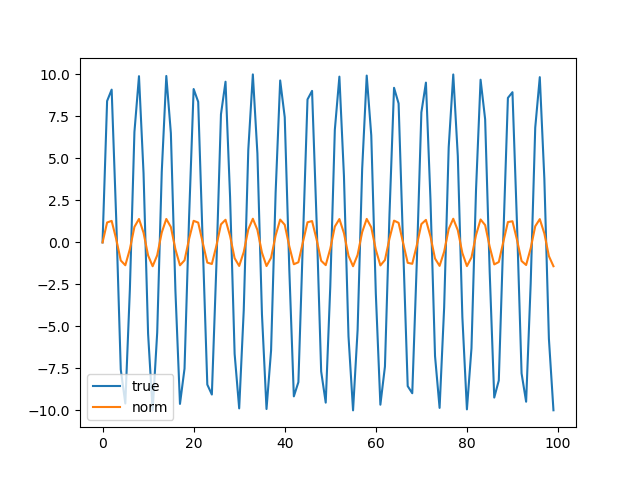

In [36]:
%matplotlib notebook
f, axx = plt.subplots()
a = np.sin(range(100))*10
b = (a - np.mean(a))/np.std(a)
axx.plot(range(len(a)), a, label='true')
axx.plot(range(len(b)), b, label='norm')
plt.legend()
plt.show()